In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pl
from collections import Counter
import numpy

In [10]:
df = pd.read_csv('/content/laptop.csv')

In [11]:
df.shape

(1303, 12)

<Axes: >

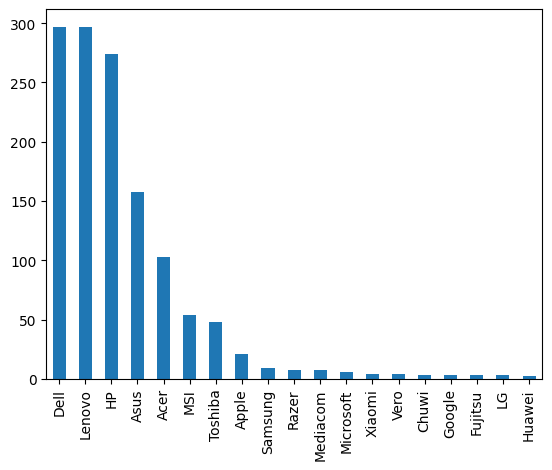

In [12]:
df['Company'].value_counts().plot(kind='bar')

<ipython-input-15-abb745ac63e9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

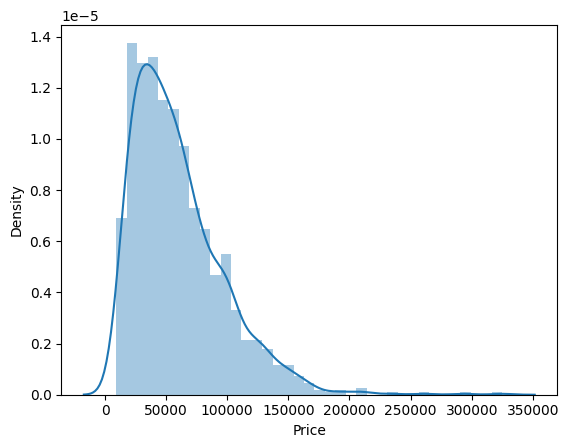

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Price'])

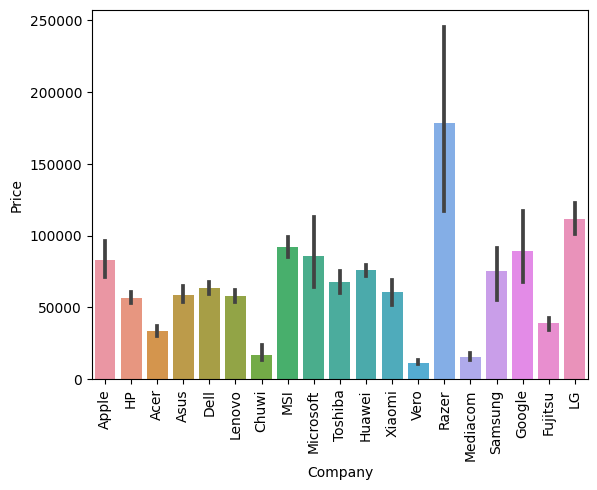

In [16]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Applying NLP Technique - NER**

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


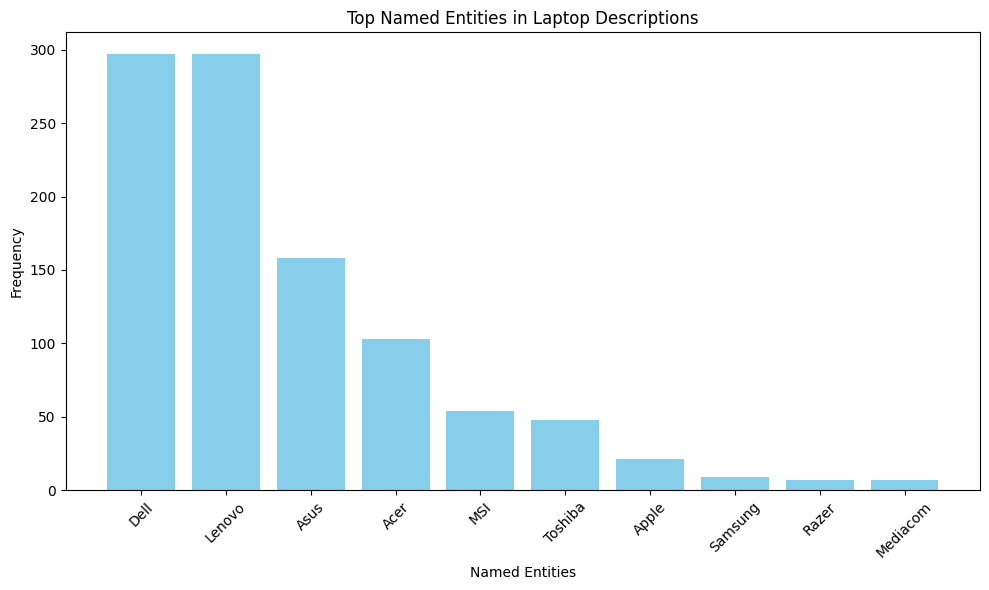

In [19]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize words and perform Named Entity Recognition (NER) on laptop descriptions
ner_entities = [nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(desc))) for desc in df['Company']]

# Extract named entities and their types
named_entities = []
for entity in ner_entities:
    for subtree in entity:
        if isinstance(subtree, nltk.tree.Tree):
            named_entities.append(' '.join([word for word, tag in subtree]))

# Counting the frequency of named entities
entity_counts = dict(Counter(named_entities))

# Plotting the frequency of named entities
plt.figure(figsize=(10, 6))
top_entities = dict(sorted(entity_counts.items(), key=lambda item: item[1], reverse=True)[:10])  # Select top 10 entities
plt.bar(top_entities.keys(), top_entities.values(), color='skyblue')
plt.title('Top Named Entities in Laptop Descriptions')
plt.xlabel('Named Entities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])


In [22]:
X

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0,Apple,Ultrabook,13,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,1,Apple,Ultrabook,13,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,2,HP,Notebook,16,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,3,Apple,Ultrabook,15,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,4,Apple,Ultrabook,13,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,1299,Lenovo,2 in 1 Convertible,13,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,1301,HP,Notebook,16,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [31]:
X_train

,Price,Inches
183,42251,16
699,36710,16
419,64755,14
997,20246,16
502,85195,14
...,...,...
466,24988,16
299,78215,16
493,30849,16
527,24456,16


In [32]:
print(data.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

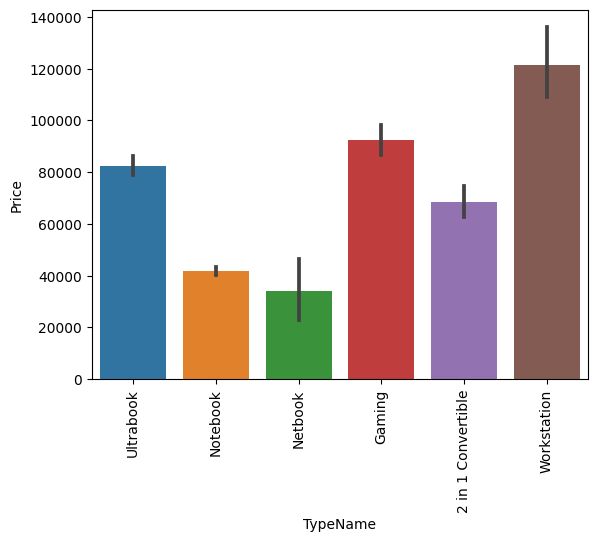

In [35]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Mean Squared Error (MSE): 572014363.4410485
R-squared Score (R2): 0.6032862767751319


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'laptops.csv' with your dataset's filename or path)
data = pd.read_csv('/content/laptop.csv')

# Select features and target variable
X = data[['Company', 'TypeName', 'ScreenResolution']]
y = data['Price']

# Define columns that need one-hot encoding
categorical_cols = ['Company', 'TypeName', 'ScreenResolution']

# Create a transformer for categorical columns using OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor to handle categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

# Assuming y_test contains the actual prices and y_pred contains the predicted prices
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared Score (R2)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R2): {r2}")

Mean Absolute Error (MAE): 16757.1039193137
R-squared Score (R2): 0.6032862767751319
